In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('H:\\Data Science\\Data science project\\Analytics vidhya\\train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print('Percentage missing in Gender = ',100*13/614,'%')

Percentage missing in Gender =  2.1172638436482085 %


In [5]:
# Replace null in gender by mode()

In [6]:
df.Gender.mode()[0]

'Male'

In [7]:
df.Gender.fillna(df.Gender.mode()[0], inplace = True)

In [8]:
df.Gender.isnull().sum()

0

In [9]:
print('Percentage missing in Married = ',100*3/614,'%')

Percentage missing in Married =  0.48859934853420195 %


In [10]:
# Replace Null in Married by mode()

In [11]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df.Married.fillna(df.Married.mode()[0], inplace=True)

In [13]:
df.Married.isnull().sum()

0

In [14]:
print('Percentage missing in Dependents = ',100*15/614,'%')

Percentage missing in Dependents =  2.44299674267101 %


In [15]:
# Fill nan from Dependents by mode()

In [16]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df.Dependents.fillna(df.Dependents.mode()[0],inplace = True)

In [18]:
df.Dependents.isnull().sum()

0

In [19]:
df.Dependents = df.Dependents.apply(lambda x: int(x[0]) if '+' in x else int(x))

In [20]:
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [21]:
df.Dependents.dtype

dtype('int64')

In [22]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
print('Percentage missing in Self_employed = ',100*32/614,'%')

Percentage missing in Self_employed =  5.2117263843648205 %


In [24]:
# though Na % is 5 we will replace using mode

In [25]:
df.Self_Employed.fillna(df.Self_Employed.mode()[0], inplace = True)

In [26]:
df.Self_Employed.isnull().sum()

0

In [27]:
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [28]:
df.LoanAmount.isnull().sum()

22

In [29]:
print('Percentage missing in Loan Amount = ',100*22/614,'%')

Percentage missing in Loan Amount =  3.583061889250814 %


In [30]:
# fill na with median

In [31]:
df.LoanAmount.fillna(df.LoanAmount.median(), inplace = True)

In [32]:
df.LoanAmount.isnull().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [34]:
print('Percentage missing in Loan Amount Term = ',100*14/614,'%')

Percentage missing in Loan Amount Term =  2.2801302931596092 %


In [35]:
# Fill Na in Loan Term column by median

In [36]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [37]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
df.Loan_Amount_Term.median()

360.0

In [39]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace  = True)

In [40]:
df.Loan_Amount_Term.isnull().sum()

0

In [41]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [42]:
print('Percentage missing in Credit History = ',100*50/614,'%')

Percentage missing in Credit History =  8.143322475570033 %


In [43]:
# Fill na from credit history using mode

In [44]:
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace =True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

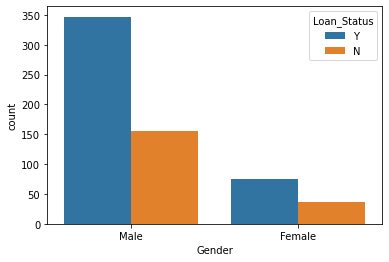

In [47]:
sns.countplot(data = df, x='Gender', hue = 'Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

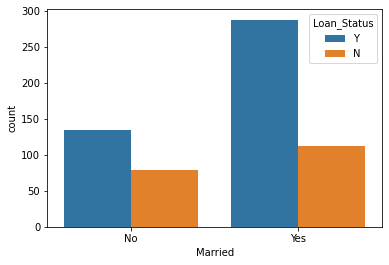

In [48]:
sns.countplot(data = df, x = 'Married',hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

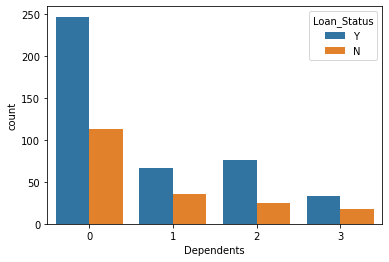

In [49]:
sns.countplot(data = df, x = 'Dependents', hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

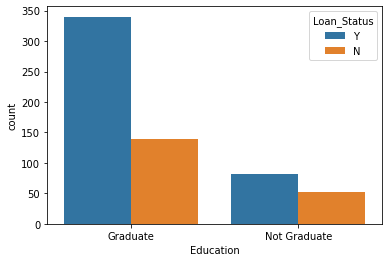

In [50]:
sns.countplot(data = df, x='Education',hue="Loan_Status")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

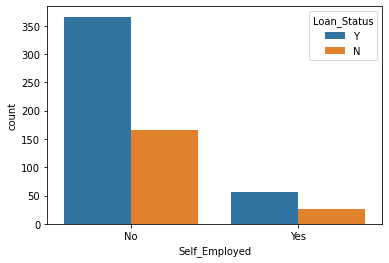

In [51]:
sns.countplot(data = df, x='Self_Employed', hue = 'Loan_Status')

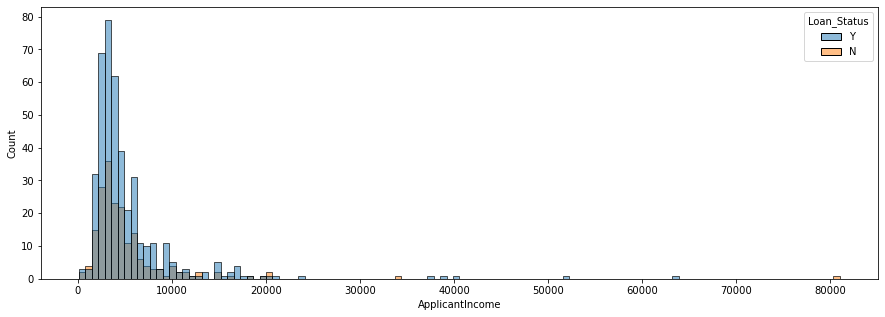

In [52]:
plt.figure(figsize=[15,5])
sns.histplot(data = df, x = 'ApplicantIncome',hue = 'Loan_Status')
plt.show()

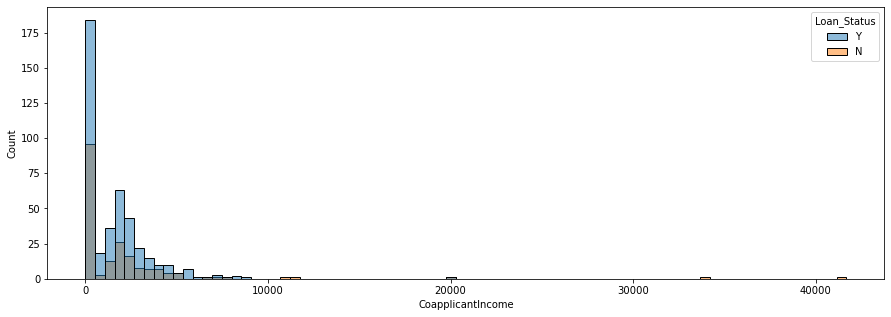

In [53]:
plt.figure(figsize=[15,5])
sns.histplot(data = df, x = 'CoapplicantIncome',hue = 'Loan_Status')
plt.show()

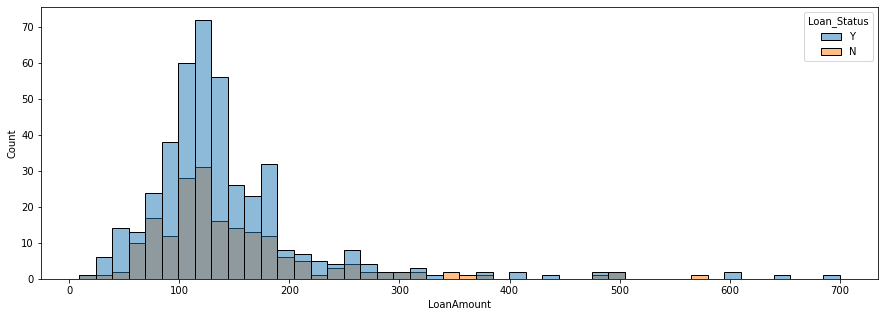

In [54]:
plt.figure(figsize=[15,5])
sns.histplot(data = df, x = 'LoanAmount',hue = 'Loan_Status')
plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

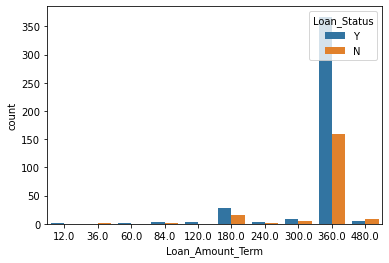

In [55]:
sns.countplot(data = df, x ='Loan_Amount_Term', hue = 'Loan_Status')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

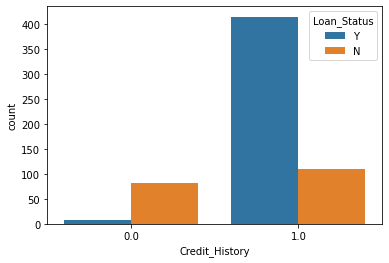

In [56]:
sns.countplot(data = df, x ='Credit_History', hue = 'Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

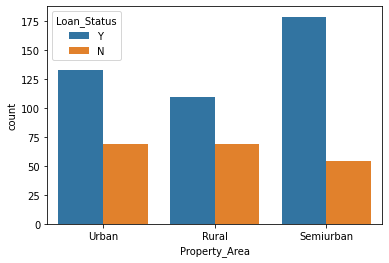

In [57]:
sns.countplot(data = df, x ='Property_Area', hue = 'Loan_Status')

In [58]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [60]:
# No duplicate data

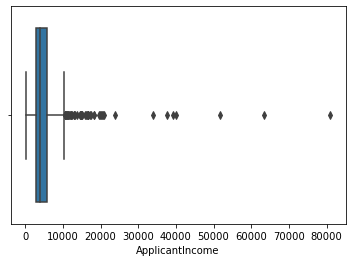

In [61]:
sns.boxplot(df['ApplicantIncome'])
plt.show()

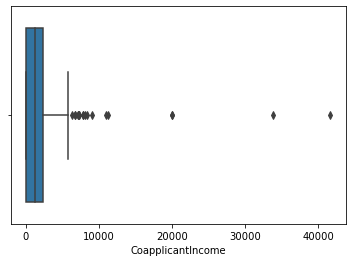

In [62]:
sns.boxplot(df['CoapplicantIncome'])
plt.show()

In [63]:
df[df.ApplicantIncome>22000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,LP001448,Male,Yes,3,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
155,LP001536,Male,Yes,3,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,Male,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [64]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [65]:
# eliminating data with income > 22000 as it may create bias in the model  

In [66]:
df1 = df[~(df.ApplicantIncome>22000)]

In [67]:
df.shape

(614, 13)

In [68]:
df1.shape

(606, 13)

<AxesSubplot:xlabel='ApplicantIncome'>

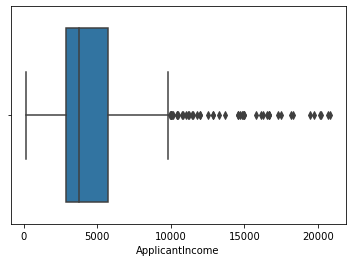

In [69]:
sns.boxplot(df1.ApplicantIncome)

In [70]:
df1[df1.CoapplicantIncome > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,LP002949,Female,No,3,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N


In [71]:
df1 = df1[~(df1.CoapplicantIncome > 20000)]

In [72]:
df1.shape

(604, 13)

In [73]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
# mapping LOan_Status column to numeric column

In [75]:
df1.Loan_Status = df1.Loan_Status.map({'Y':1,'N':0})

In [76]:
df1.Loan_Status.value_counts()

1    416
0    188
Name: Loan_Status, dtype: int64

In [77]:
gender_dummies = pd.get_dummies(df1.Gender, drop_first = True) 

In [78]:
gender_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 613
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Male    604 non-null    uint8
dtypes: uint8(1)
memory usage: 5.3 KB


In [79]:
married_dummies = pd.get_dummies(df1.Married, drop_first = True) 

In [80]:
education_dummies = pd.get_dummies(df1.Education, drop_first = True) 

In [81]:
self_employed_dummies = pd.get_dummies(df1.Self_Employed,drop_first = True) 

In [82]:
prop_area_dummies = pd.get_dummies(df1.Property_Area, drop_first = True) 

In [83]:
df1 = pd.concat([df1,gender_dummies,married_dummies,education_dummies,self_employed_dummies,prop_area_dummies], axis =1)

In [84]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,1,0,0,0,0,1


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 613
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            604 non-null    object 
 1   Gender             604 non-null    object 
 2   Married            604 non-null    object 
 3   Dependents         604 non-null    int64  
 4   Education          604 non-null    object 
 5   Self_Employed      604 non-null    object 
 6   ApplicantIncome    604 non-null    int64  
 7   CoapplicantIncome  604 non-null    float64
 8   LoanAmount         604 non-null    float64
 9   Loan_Amount_Term   604 non-null    float64
 10  Credit_History     604 non-null    float64
 11  Property_Area      604 non-null    object 
 12  Loan_Status        604 non-null    int64  
 13  Male               604 non-null    uint8  
 14  Yes                604 non-null    uint8  
 15  Not Graduate       604 non-null    uint8  
 16  Yes                604 non

In [86]:
df1.drop(['Gender','Married','Education','Self_Employed', 'Property_Area'], axis =1, inplace =True)

In [87]:
inputs = df1.drop(['Loan_ID','Loan_Status'], axis =1)

In [88]:
inputs.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [89]:
target = df1.Loan_Status

In [90]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Hyper parameter tuning

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

model_params={
    'svm':{
        'model':SVC(gamma = 'auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'log_reg':{
        'model':LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params':{
            'C':[10,20,30]
        }
    },
     'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
            
        }
     }
}

scores=[]
for model_name, mp in model_params.items():
    rs = RandomizedSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False, n_iter = 2)
    rs.fit(inputs,target)
    scores.append({
        'model': model_name,
        'best_score': rs.best_score_,
        'best_params': rs.best_params_
    })

df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

In [92]:
# Logistic regression among the four gives better result

In [93]:
lr = LogisticRegression(C =10)

In [94]:
lr.fit(inputs,target)

LogisticRegression(C=10)

In [95]:
df = pd.read_csv('H:\\Data Science\\Data science project\\Analytics vidhya\\test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [97]:
df.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [98]:
print("Percentage Na values in Gender = ",(367-356)*100/367,'%' )

Percentage Na values in Gender =  2.997275204359673 %


In [99]:
df.Gender = df.Gender.fillna(df.Gender.mode()[0])

In [100]:
df.Gender.value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [101]:
df.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [102]:
print("Percentage Na values in Dependents = ",(367-357)*100/367,'%' )

Percentage Na values in Dependents =  2.7247956403269753 %


In [103]:
df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0])

In [104]:
df.Dependents = df.Dependents.apply(lambda x: int(x[0]) if '+' in x else int(x) )

In [105]:
df.Dependents.dtype

dtype('int64')

In [106]:
df.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [107]:
print("Percentage Na values in Self_Employed = ",(367-344)*100/367,'%' )

Percentage Na values in Self_Employed =  6.267029972752043 %


In [108]:
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode()[0])

In [109]:
df.LoanAmount.value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64

In [110]:
print("Percentage Na values in LoanAmount = ",(367-362)*100/367,'%' )

Percentage Na values in LoanAmount =  1.3623978201634876 %


In [111]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mode()[0])

In [112]:
df.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [113]:
print("Percentage Na values in Loan_Amount_Term = ",(367-361)*100/367,'%' )

Percentage Na values in Loan_Amount_Term =  1.6348773841961852 %


In [114]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])

In [115]:
df.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [116]:
print("Percentage Na values in Credit_History = ",(367-338)*100/367,'%' )

Percentage Na values in Credit_History =  7.901907356948229 %


In [117]:
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mode()[0])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


In [119]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [120]:
married_dummies = pd.get_dummies(df.Married, drop_first = True) 

In [121]:
Gender_dummies = pd.get_dummies(df.Gender, drop_first = True) 

In [122]:
education_dummies = pd.get_dummies(df.Education, drop_first = True) 

In [123]:
self_employed_dummies = pd.get_dummies(df.Self_Employed, drop_first = True) 

In [124]:
prop_area_dummies = pd.get_dummies(df.Property_Area, drop_first = True) 

In [125]:
df1 = pd.concat([df,married_dummies,Gender_dummies,education_dummies,self_employed_dummies,prop_area_dummies],axis =1)

In [126]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Yes,Male,Not Graduate,Yes,Semiurban,Urban
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1,0,0,0,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,0,0,0,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1,0,0,0,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1,1,0,0,0,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,1,1,0,0,1


In [127]:
df1.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area'],axis =1,inplace = True)

In [128]:
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Male,Not Graduate,Yes,Semiurban,Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,2,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,0,1,1,0,0,1


In [129]:
pred = lr.predict(df1)

In [130]:
df_result  = df.iloc[:,0:1]
df_result.head(3)

,Loan_ID
0,LP001015
1,LP001022
2,LP001031


In [131]:
df_result['Loan_Status']= pred
df_result.head(3)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1


In [133]:
df_result['Loan_Status']= df_result.Loan_Status.map({1:'Y',0:'N'})

In [134]:
df_result.head(3)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y


In [137]:
df_result.to_csv('sample_submission.csv', index = False)